# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [10]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [16]:
dtype_df = app_train.dtypes.reset_index() 
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [18]:
int_features = []
float_features = []
object_features = []

for dtype, feature in zip(app_train.dtypes, app_train.columns) :
    if dtype == 'int64' :
        int_features.append(feature)
    elif dtype == 'float64' :
        float_features.append(feature)
    else :
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [39]:
int_mean = app_train[int_features].mean()
int_median = app_train[int_features].median()
int_mode = app_train[int_features].mode()
int_mean

SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_ID_PUBLISH                 -2994.202373
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.031521
HOUR_APPR_PROCESS_START            12.063419
REG_REGION_NOT_LIVE_REGION          0.015144
REG_REGION_NOT_WORK_REGION          0.050769
LIVE_REGION_NOT_WORK_REGION         0.040659
REG_CITY_NOT_LIVE_CITY              0.078173
REG_CITY_NOT_WORK_CITY              0.230454
LIVE_CITY_NOT_WORK_CITY             0.179555
FLAG_DOCUMENT_2                     0.000042
FLAG_DOCUM

In [40]:
int_min = app_train[int_features].min()
int_max = app_train[int_features].max()
#int_min = app_train[int_features].range()
int_quantile = app_train[int_features].quantile()
int_var = app_train[int_features].var()
int_std = app_train[int_features].std()
int_var

SK_ID_CURR                     1.056582e+10
TARGET                         7.421192e-02
CNT_CHILDREN                   5.214593e-01
DAYS_BIRTH                     1.904440e+07
DAYS_EMPLOYED                  1.995884e+10
DAYS_ID_PUBLISH                2.278441e+06
FLAG_MOBIL                     3.251916e-06
FLAG_EMP_PHONE                 1.476713e-01
FLAG_WORK_PHONE                1.596212e-01
FLAG_CONT_MOBILE               1.863122e-03
FLAG_PHONE                     2.020687e-01
FLAG_EMAIL                     5.350295e-02
REGION_RATING_CLIENT           2.591155e-01
REGION_RATING_CLIENT_W_CITY    2.527445e-01
HOUR_APPR_PROCESS_START        1.066566e+01
REG_REGION_NOT_LIVE_REGION     1.491488e-02
REG_REGION_NOT_WORK_REGION     4.819159e-02
LIVE_REGION_NOT_WORK_REGION    3.900570e-02
REG_CITY_NOT_LIVE_CITY         7.206206e-02
REG_CITY_NOT_WORK_CITY         1.773453e-01
LIVE_CITY_NOT_WORK_CITY        1.473152e-01
FLAG_DOCUMENT_2                4.227326e-05
FLAG_DOCUMENT_3                2

In [41]:
int_std

SK_ID_CURR                     102790.175348
TARGET                              0.272419
CNT_CHILDREN                        0.722121
DAYS_BIRTH                       4363.988632
DAYS_EMPLOYED                  141275.766519
DAYS_ID_PUBLISH                  1509.450419
FLAG_MOBIL                          0.001803
FLAG_EMP_PHONE                      0.384280
FLAG_WORK_PHONE                     0.399526
FLAG_CONT_MOBILE                    0.043164
FLAG_PHONE                          0.449521
FLAG_EMAIL                          0.231307
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.502737
HOUR_APPR_PROCESS_START             3.265832
REG_REGION_NOT_LIVE_REGION          0.122126
REG_REGION_NOT_WORK_REGION          0.219526
LIVE_REGION_NOT_WORK_REGION         0.197499
REG_CITY_NOT_LIVE_CITY              0.268444
REG_CITY_NOT_WORK_CITY              0.421124
LIVE_CITY_NOT_WORK_CITY             0.383817
FLAG_DOCUMENT_2                     0.006502
FLAG_DOCUM

In [42]:
float_mean = app_train[float_features].mean()
float_median = app_train[float_features].median()
float_mode = app_train[float_features].mode()
float_mean

AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
REGION_POPULATION_RELATIVE         0.020868
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 65, dtype: float64

In [43]:
float_min = app_train[float_features].min()
float_max = app_train[float_features].max()
#int_min = app_train[int_features].range()
float_quantile = app_train[float_features].quantile()
float_var = app_train[float_features].var()
float_std = app_train[float_features].std()
float_var

AMT_INCOME_TOTAL              5.622739e+10
AMT_CREDIT                    1.619988e+11
AMT_ANNUITY                   2.100684e+08
AMT_GOODS_PRICE               1.364907e+11
REGION_POPULATION_RELATIVE    1.913043e-04
                                  ...     
AMT_REQ_CREDIT_BUREAU_DAY     1.226720e-02
AMT_REQ_CREDIT_BUREAU_WEEK    4.189590e-02
AMT_REQ_CREDIT_BUREAU_MON     8.390604e-01
AMT_REQ_CREDIT_BUREAU_QRT     6.305244e-01
AMT_REQ_CREDIT_BUREAU_YEAR    3.494264e+00
Length: 65, dtype: float64

In [44]:
float_std

AMT_INCOME_TOTAL              237123.146279
AMT_CREDIT                    402490.776996
AMT_ANNUITY                    14493.737315
AMT_GOODS_PRICE               369446.460540
REGION_POPULATION_RELATIVE         0.013831
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.110757
AMT_REQ_CREDIT_BUREAU_WEEK         0.204685
AMT_REQ_CREDIT_BUREAU_MON          0.916002
AMT_REQ_CREDIT_BUREAU_QRT          0.794056
AMT_REQ_CREDIT_BUREAU_YEAR         1.869295
Length: 65, dtype: float64

In [61]:
app_train[float_features].columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [65]:
app_train[float_features]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 0, 'AMT_INCOME_TOTAL')

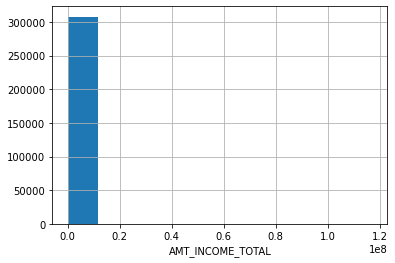

In [68]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

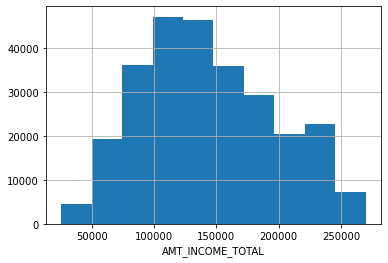

In [88]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.9)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

In [90]:
app_train['AMT_INCOME_TOTAL'].quantile(0.9)['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

AttributeError: 'numpy.float64' object has no attribute 'hist'